In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string

In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [13]:
from utility.textProcessorUtils import convert_emojis, convert_emoticons, remove_emoji, remove_emoticons
from utility.textReplaceUtils import replace_hashtags, replace_user_handles, replace_phone_numbers, replace_urls

In [14]:
def preprocess(text):
    text = replace_hashtags(text)
    text = replace_user_handles(text)
    text = replace_urls(text)
    text = replace_phone_numbers(text)
    text = ''.join(text.split('\n'))
    text = ' '.join(text.split(' '))
    return text

In [17]:
df_train = pd.read_csv('../data/rough_train_dataset.csv', sep=',', converters={'tweet': preprocess})

# Class distribution

Text(0, 0.5, 'samples')

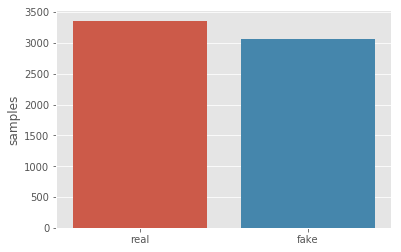

In [20]:
x = df_train.label.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('samples')

# EDA of tweets

## Number of characters in a tweet

We see that the distribution is very different here.
The real tweets are a little more lengthy than the fake ones.

The real tweets vary from 200 to 300 characters in length whereas the fake ones vary from 50 to 150 characters in length.

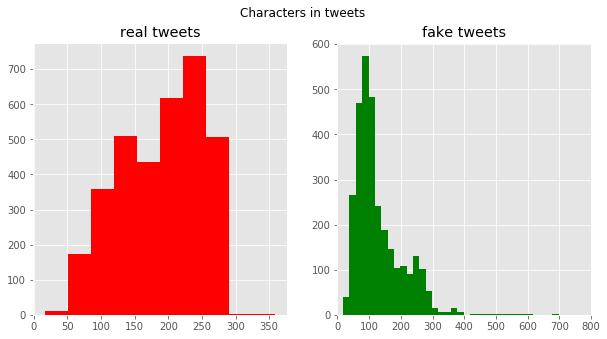

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

tweet_len=df_train[df_train['label']=='real']['tweet'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('real tweets')

tweet_len=df_train[df_train['label']=='fake']['tweet'].str.len()
ax2.hist(tweet_len,color='green', bins=range(min(tweet_len), max(tweet_len) + 20, 20))
plt.xlim(left=0, right = 800)
ax2.set_title('fake tweets')

fig.suptitle('Characters in tweets')
plt.show()

## Number of words in a tweet

As expected, the real tweets use a little more words on average. Which means, they use around 30-50 words on average; whereas fake tweets use 10-30 words on average.

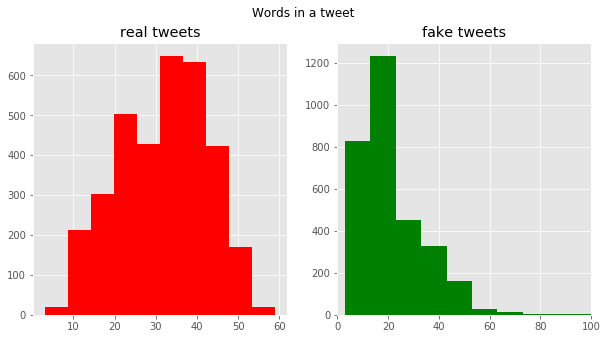

In [46]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

tweet_len=df_train[df_train['label']=='real']['tweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('real tweets')

tweet_len=df_train[df_train['label']=='fake']['tweet'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green', bins=range(min(tweet_len), max(tweet_len) + 10, 10))
plt.xlim(left=0, right = 100)
ax2.set_title('fake tweets')

fig.suptitle('Words in a tweet')
plt.show()

## Average word length in a tweet

This is quite similar. Although the real tweets are a little longer, on average both the tweets use similar sized words on average.

Text(0.5, 0.98, 'Average word length in each tweet')

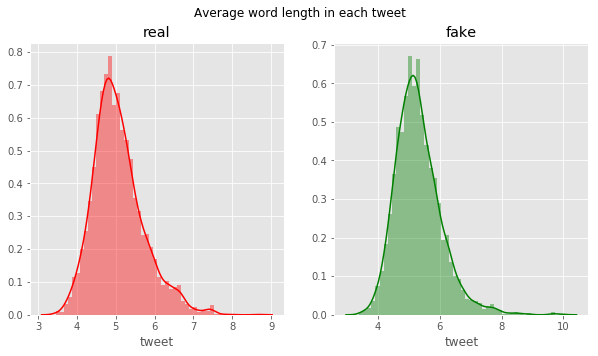

In [47]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

word=df_train[df_train['label']=='real']['tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('real')

word=df_train[df_train['label']=='fake']['tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('fake')

fig.suptitle('Average word length in each tweet')

## Most common words

In [51]:
import plotly.graph_objs as go
import plotly.offline as py
import regex as re
import seaborn as sns
from gensim import corpora, models
from plotly import tools
from wordcloud import STOPWORDS, ImageColorGenerator, WordCloud

def get_stopwords():
    """Get the stopwords
    @return: Set of stopwords
    """
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    return stopwords.union(more_stopwords)

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0, 16.0),
                   title=None, title_size=40, image_color=False):
    """This method plots the word cloud for the text column
    in the dataframe
    @param text: This is the dataframe['text_col_name']
    @param mask: This is not required.
    @param max_words: The maximum number fo words which we will plot
    @param max_font_size: The max font size
    @param figure_size: Fig size
    @param title: Title of the plot
    @param title_size: Size of the title
    @param image_color: Colour of the image
    """
    stopwords = get_stopwords()
    wordcloud = WordCloud(background_color='black',
                          stopwords=stopwords,
                          max_words=max_words,
                          max_font_size=max_font_size,
                          random_state=42,
                          width=800,
                          height=400,
                          mask=mask)
    wordcloud.generate(str(text))
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()

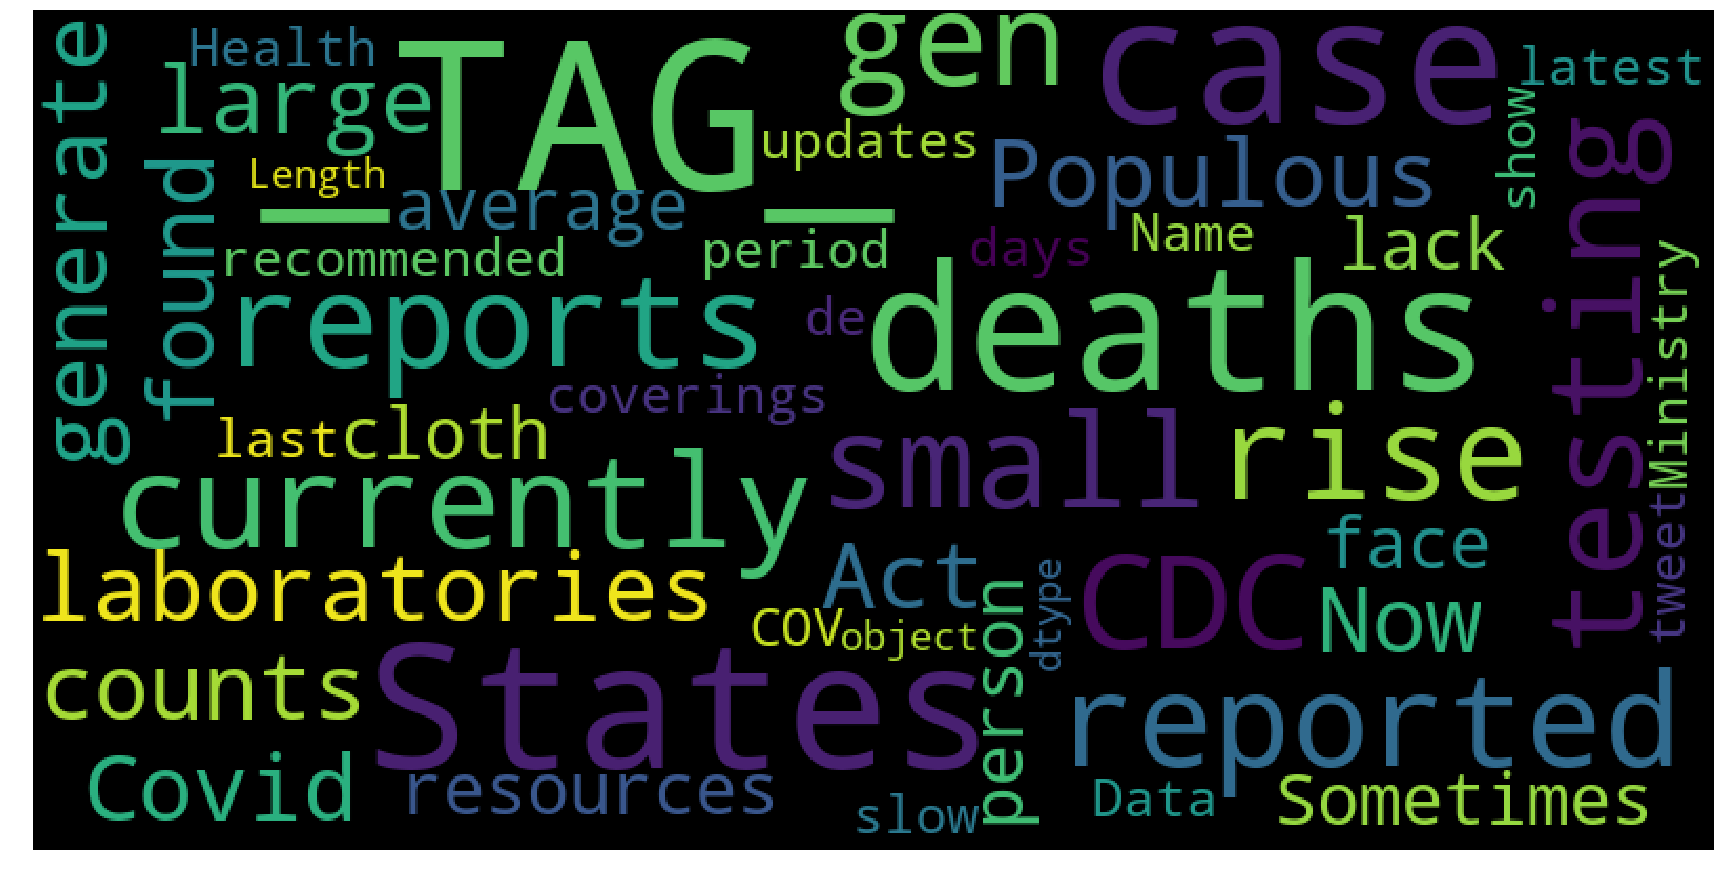

In [52]:
plot_wordcloud(df_train[df_train['label'] == 'real']['tweet'])

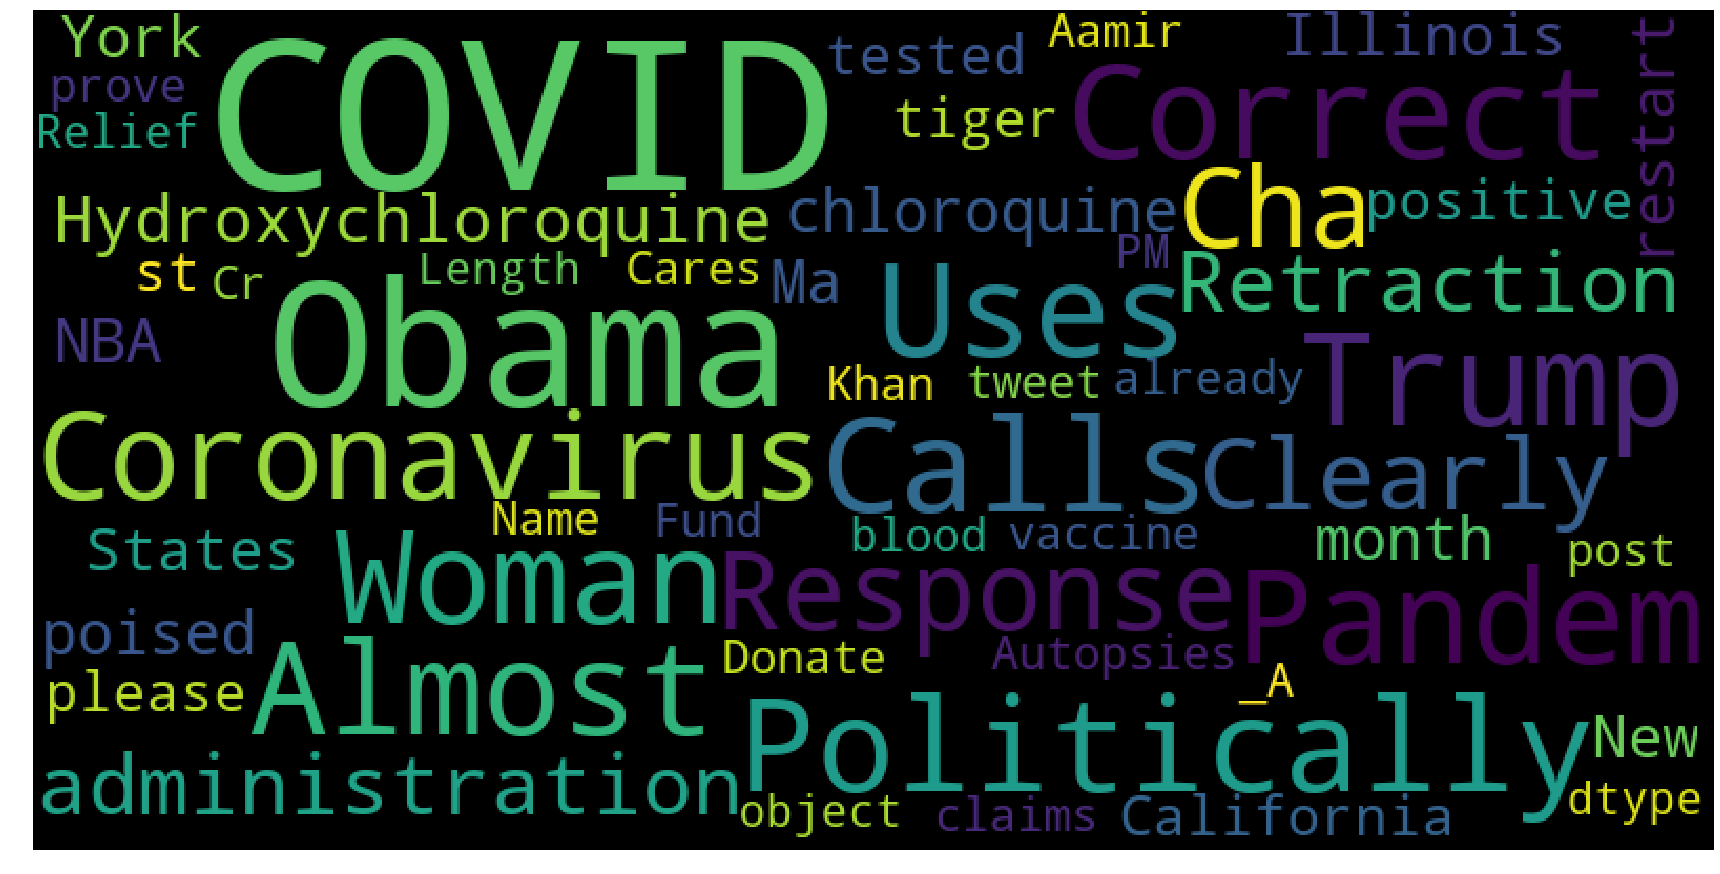

In [53]:
plot_wordcloud(df_train[df_train['label'] == 'fake']['tweet'])

## Tweet sentiment distribution

## Emoji distribution

## N-gram distribution